In [3]:
import json

with open("data/all_delisted_data.json") as f:
    delisted_data = json.load(f)

with open("data/all_formatted_pre_data.json") as f:
    all_data = json.load(f)
    

In [14]:
import numpy as np

def get_log_diff(data):
    add_00000000001_data = []
    for i in range(len(data)):
        add_00000000001_data.append(data[i] + 0000000000.1)
    # 対数を取り、差分を計算
    price_log = list(np.log(add_00000000001_data))

    price_log_diff = []

    for i in range(len(price_log)-1):
        price_log_diff.append((price_log[i+1] - price_log[i]))

    return price_log_diff



In [15]:
import pandas as pd

delisted_dataframe = pd.DataFrame({
    "id": [],
    "time": [],
    "price": [],
    "volume": [],
})

all_data_dataframe = pd.DataFrame({
    "id": [],
    "time": [],
    "price": [],
    "volume": [],
})



In [16]:
for i, (key, value) in enumerate(delisted_data.items()):
    format_data = []
    price_log_diff = get_log_diff(value["price"])
    volume_log_diff = get_log_diff(value["volume"])
    for j in range(len(price_log_diff)):
        time = j + 1
        add_list = [key, time, price_log_diff[j], volume_log_diff[j]]
        format_data.append(add_list)
    format_dataframe = pd.DataFrame(format_data, columns=["id", "time", "price", "volume"])
    delisted_dataframe = pd.concat([delisted_dataframe, format_dataframe])

for i, (key, value) in enumerate(all_data.items()):
    format_data = []
    price_log_diff = get_log_diff(value["price"])
    volume_log_diff = get_log_diff(value["volume"])
    for j in range(len(price_log_diff)):
        time = j + 1
        add_list = [key, time, price_log_diff[j], volume_log_diff[j]]
        format_data.append(add_list)
    format_all_dataframe = pd.DataFrame(format_data, columns=["id", "time", "price", "volume"])
    all_data_dataframe = pd.concat([all_data_dataframe, format_all_dataframe])


In [17]:
all_data_dataframe

,id,time,price,volume
0,0x,1.0,0.010023,-0.320958
1,0x,2.0,0.021138,0.290505
2,0x,3.0,-0.006925,-0.062553
3,0x,4.0,0.015413,0.132340
4,0x,5.0,-0.005268,0.185544
...,...,...,...,...
359,zilliqa,360.0,0.005268,0.247652
360,zilliqa,361.0,-0.002811,-0.232556
361,zilliqa,362.0,-0.010484,-0.034889
362,zilliqa,363.0,-0.004542,-0.116495


In [18]:
from tsfresh.feature_extraction import extract_features

delisted_features = extract_features(
    timeseries_container=delisted_dataframe,
    default_fc_parameters=None,
    column_id='id',
    column_sort='time',
    column_kind=None,
    column_value=None
)


Feature Extraction: 100%|██████████| 20/20 [00:02<00:00,  8.52it/s]


In [19]:
all_features = extract_features(
    timeseries_container=all_data_dataframe,
    default_fc_parameters=None,
    column_id='id',
    column_sort='time',
    column_kind=None,
    column_value=None
)

Feature Extraction: 100%|██████████| 20/20 [00:14<00:00,  1.35it/s]


In [20]:
all_features

,price__variance_larger_than_standard_deviation,price__has_duplicate_max,price__has_duplicate_min,price__has_duplicate,price__sum_values,price__abs_energy,price__mean_abs_change,price__mean_change,price__mean_second_derivative_central,price__median,...,volume__fourier_entropy__bins_5,volume__fourier_entropy__bins_10,volume__fourier_entropy__bins_100,volume__permutation_entropy__dimension_3__tau_1,volume__permutation_entropy__dimension_4__tau_1,volume__permutation_entropy__dimension_5__tau_1,volume__permutation_entropy__dimension_6__tau_1,volume__permutation_entropy__dimension_7__tau_1,volume__query_similarity_count__query_None__threshold_0.0,volume__mean_n_absolute_max__number_of_maxima_7
0x,0.0,0.0,0.0,0.0,0.629003,0.497500,0.035271,-0.000033,0.000001,0.001827,...,1.025991,1.613399,3.539663,1.776428,3.131107,4.567217,5.526770,5.811780,NaN,2.457161
1inch,0.0,0.0,0.0,0.0,0.072278,0.326034,0.030257,-0.000072,-0.000060,0.001897,...,1.038340,1.659804,3.617772,1.787350,3.136151,4.557687,5.505569,5.826320,NaN,1.674690
aave,0.0,0.0,0.0,0.0,0.762703,0.537715,0.041812,-0.000025,0.000038,0.002040,...,0.871249,1.469764,3.404746,1.778199,3.120543,4.554278,5.491262,5.795342,NaN,1.383139
aavegotchi,0.0,0.0,0.0,0.0,0.018191,0.300447,0.028801,-0.000030,-0.000076,-0.000218,...,0.729814,1.262223,3.230352,1.777218,3.078689,4.445840,5.392805,5.773057,NaN,2.335815
acala,0.0,0.0,0.0,0.0,-0.043734,0.195049,0.025310,-0.000081,-0.000143,-0.001495,...,0.873631,1.400068,3.318021,1.779582,3.090583,4.518087,5.546271,5.826320,NaN,2.299866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yield-guild-games,0.0,0.0,0.0,0.0,0.712996,1.127462,0.055051,-0.000015,0.000047,0.001499,...,0.614665,1.202695,3.190036,1.788881,3.154906,4.592179,5.548239,5.801625,NaN,1.703531
zcash,0.0,0.0,0.0,0.0,-0.259510,0.413084,0.037128,0.000016,0.000070,0.002944,...,0.715716,1.239549,3.198853,1.790059,3.136308,4.569601,5.515378,5.830193,NaN,1.273748
zcoin,0.0,0.0,0.0,0.0,0.346349,0.437314,0.037404,-0.000024,0.000008,0.002959,...,1.004813,1.630778,3.570690,1.770161,3.106741,4.544774,5.563685,5.780802,NaN,2.488453
zelcash,0.0,0.0,0.0,0.0,0.268422,0.509574,0.040567,-0.000161,0.000034,-0.000776,...,1.105329,1.762824,3.749171,1.776451,3.123669,4.548510,5.564950,5.849554,NaN,1.710638


In [21]:
from tsfresh.utilities.dataframe_functions import impute

impute(delisted_features)
impute(all_features)


/Users/hiroki/anaconda3/lib/python3.10/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['price__query_similarity_count__query_None__threshold_0.0'
 'volume__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(
/Users/hiroki/anaconda3/lib/python3.10/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['price__query_similarity_count__query_None__threshold_0.0'
 'volume__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


,price__variance_larger_than_standard_deviation,price__has_duplicate_max,price__has_duplicate_min,price__has_duplicate,price__sum_values,price__abs_energy,price__mean_abs_change,price__mean_change,price__mean_second_derivative_central,price__median,...,volume__fourier_entropy__bins_5,volume__fourier_entropy__bins_10,volume__fourier_entropy__bins_100,volume__permutation_entropy__dimension_3__tau_1,volume__permutation_entropy__dimension_4__tau_1,volume__permutation_entropy__dimension_5__tau_1,volume__permutation_entropy__dimension_6__tau_1,volume__permutation_entropy__dimension_7__tau_1,volume__query_similarity_count__query_None__threshold_0.0,volume__mean_n_absolute_max__number_of_maxima_7
0x,0.0,0.0,0.0,0.0,0.629003,0.497500,0.035271,-0.000033,0.000001,0.001827,...,1.025991,1.613399,3.539663,1.776428,3.131107,4.567217,5.526770,5.811780,0.0,2.457161
1inch,0.0,0.0,0.0,0.0,0.072278,0.326034,0.030257,-0.000072,-0.000060,0.001897,...,1.038340,1.659804,3.617772,1.787350,3.136151,4.557687,5.505569,5.826320,0.0,1.674690
aave,0.0,0.0,0.0,0.0,0.762703,0.537715,0.041812,-0.000025,0.000038,0.002040,...,0.871249,1.469764,3.404746,1.778199,3.120543,4.554278,5.491262,5.795342,0.0,1.383139
aavegotchi,0.0,0.0,0.0,0.0,0.018191,0.300447,0.028801,-0.000030,-0.000076,-0.000218,...,0.729814,1.262223,3.230352,1.777218,3.078689,4.445840,5.392805,5.773057,0.0,2.335815
acala,0.0,0.0,0.0,0.0,-0.043734,0.195049,0.025310,-0.000081,-0.000143,-0.001495,...,0.873631,1.400068,3.318021,1.779582,3.090583,4.518087,5.546271,5.826320,0.0,2.299866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yield-guild-games,0.0,0.0,0.0,0.0,0.712996,1.127462,0.055051,-0.000015,0.000047,0.001499,...,0.614665,1.202695,3.190036,1.788881,3.154906,4.592179,5.548239,5.801625,0.0,1.703531
zcash,0.0,0.0,0.0,0.0,-0.259510,0.413084,0.037128,0.000016,0.000070,0.002944,...,0.715716,1.239549,3.198853,1.790059,3.136308,4.569601,5.515378,5.830193,0.0,1.273748
zcoin,0.0,0.0,0.0,0.0,0.346349,0.437314,0.037404,-0.000024,0.000008,0.002959,...,1.004813,1.630778,3.570690,1.770161,3.106741,4.544774,5.563685,5.780802,0.0,2.488453
zelcash,0.0,0.0,0.0,0.0,0.268422,0.509574,0.040567,-0.000161,0.000034,-0.000776,...,1.105329,1.762824,3.749171,1.776451,3.123669,4.548510,5.564950,5.849554,0.0,1.710638


In [22]:
# さらに条件を追加: True/Falseや0,1のみの列も含む
def del_binary(data):
    binary_features = [
        col for col in data.columns 
        if (
            data[col].nunique() == 2 or                # ユニーク値が2つ
            set(data[col].dropna().unique()) <= {0, 1} # 値が0,1のみ
        )
    ]

    # 2値特徴量以外を取得
    non_binary_features = data.drop(columns=binary_features)
    return binary_features, non_binary_features

delisted_binary_features, delisted_non_binary_features = del_binary(delisted_features)
all_non_binary_features = all_features.drop(columns=delisted_binary_features)
print(delisted_non_binary_features)
print(all_non_binary_features)

                           price__sum_values  price__abs_energy  \
aragon                          9.335105e-01       4.126249e-01   
barnbridge                      3.262907e-01       1.917704e+00   
concentrated-voting-power       9.436837e-02       3.470646e-01   
drep-new                       -4.512003e-02       8.399459e-01   
ethos                          -5.085825e-01       7.456431e-01   
force-protocol                  6.722985e-02       1.707263e-02   
keep3rv1                        2.835126e-01       5.542491e-01   
loom-network-new                3.945824e-01       5.467959e-01   
mobster                        -4.292682e-10       9.009561e-14   
monero                          1.172424e-01       1.526680e-01   
nem                             7.440402e-02       4.395436e-02   
omisego                        -1.866607e-01       8.741974e-01   
ooki                           -6.779287e-03       6.479415e-04   
pnetwork                        2.773317e-01       5.829099e-0

In [23]:
joined_data_feature = pd.concat([delisted_non_binary_features, all_non_binary_features])
joined_data_feature = joined_data_feature.drop("yearn-finance")

In [24]:
from scipy.stats import ks_2samp

import numpy as np

# 異常値を検出する関数
def remove_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return [x for x in data if lower_bound <= x <= upper_bound]


def check_KS_value(group1, group2):
    # Kolmogorov-Smirnov検定
    k, p_value = ks_2samp(group1, group2)

    # p値の判定
    if p_value < 0.05:
        return p_value, 1
    else:
        return p_value, 0

In [43]:
import re
good_index = []
p_value_list = []

for i, (key, value) in enumerate(joined_data_feature.items()):
    group1 = remove_outliers(value[:21])
    group2 = remove_outliers(value[21:])
    p_value, result = check_KS_value(list(group1), list(group2))
    if result and (("price__fft" not in key) and ("volume__fft" not in key)):
        good_index.append([i, key])
    p_value_list.append(p_value)


In [44]:
good_index

[[4, 'price__mean_second_derivative_central'],
 [45, 'price__autocorrelation__lag_3'],
 [53, 'price__agg_autocorrelation__f_agg_"median"__maxlag_40'],
 [84, 'price__cwt_coefficients__coeff_1__w_2__widths_(2, 5, 10, 20)'],
 [88, 'price__cwt_coefficients__coeff_2__w_2__widths_(2, 5, 10, 20)'],
 [116, 'price__cwt_coefficients__coeff_9__w_2__widths_(2, 5, 10, 20)'],
 [144, 'price__ar_coefficient__coeff_1__k_10'],
 [624, 'price__friedrich_coefficients__coeff_1__m_3__r_30'],
 [628, 'price__linear_trend__attr_"pvalue"'],
 [694, 'price__energy_ratio_by_chunks__num_segments_10__segment_focus_9'],
 [748, 'volume__benford_correlation'],
 [761, 'volume__quantile__q_0.6'],
 [878, 'volume__change_quantiles__f_agg_"var"__isabs_False__qh_0.2__ql_0.0'],
 [921, 'volume__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.4'],
 [928, 'volume__change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.6']]

In [45]:
good_p_value_list = []

for value in good_index:
    good_p_value_list.append(p_value_list[value[0]])

sorted_good_p_value_list_index = np.array(good_p_value_list).argsort()
len(sorted_good_p_value_list_index)

15

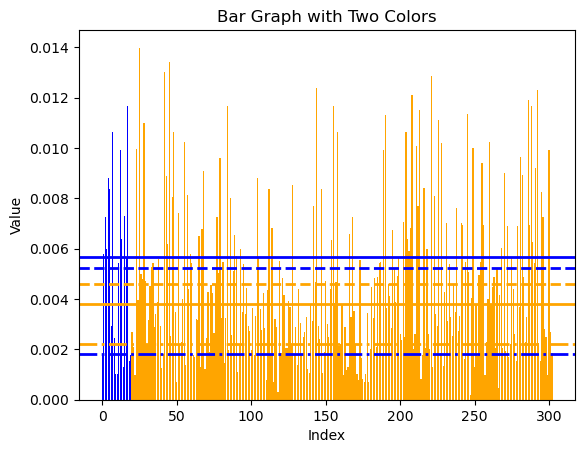

'volume__change_quantiles__f_agg_"var"__isabs_True__qh_0.8__ql_0.6'

In [59]:
import numpy as np
import matplotlib.pyplot as plt

display_data = []
a_data = []
b_data = []

index_value = 13

for i, value in enumerate(remove_outliers(joined_data_feature[good_index[sorted_good_p_value_list_index[index_value]][1]])):
    display_data.append(value)
    if i < 21:
        a_data.append(value)
    else:
        b_data.append(value)

# インデックス
indices = np.arange(len(display_data))

a_mean = np.mean(a_data)
b_mean = np.mean(b_data)
a_med = np.median(a_data)
b_med = np.median(b_data)
a_25 = np.percentile(a_data, 25)
b_25 = np.percentile(b_data, 25)

# 色を分ける
colors = ['blue'] * 20 + ['orange'] * (len(display_data) - 5)

# プロット
plt.bar(indices, display_data, color=colors)

plt.axhline(y=a_mean, color='blue', linestyle='--', linewidth=2, label='Group 1 Mean')
plt.axhline(y=b_mean, color='orange', linestyle='--', linewidth=2, label='Group 2 Mean')
plt.axhline(y=a_med, color='blue', linestyle='-', linewidth=2, label='Group 1 Mean')
plt.axhline(y=b_med, color='orange', linestyle='-', linewidth=2, label='Group 2 Mean')
plt.axhline(y=a_25, color='blue', linestyle='-.', linewidth=2, label='Group 1 Mean')
plt.axhline(y=b_25, color='orange', linestyle="-.", linewidth=2, label='Group 2 Mean')

# ラベルやタイトルを追加
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Bar Graph with Two Colors")

# 表示
plt.show()

good_index[sorted_good_p_value_list_index[index_value]][1]